Title: Analysis of Attributes Relating to User Knowledge Levels In a DC Machine Dataset.

Introduction:

<li> Background Information </li>

Knowledge modeling is the process of creating a model of knowledge and/or specifications for a particular process, structure, or entity that is interpretable by a computer. In this case, the dataset models knowledge of students in the field of electrical DC machines that convert direct current electrical energy into mechanical energy through various measures such as study time and study repetition through modeling methods. DC machines are used in applications where a wide range of speeds and precise good regulation is a requirement alongside widespread use of AC machines which use alternating current. <br>

<li> Statement of the Question We Wish to Answer </li>
Which 2 attributes out of the ones given (within the two groups as determined by their scales) are most correlated with user knowledge level and how are those attributes correlated amongst themselves? 
<br><br>

<li> Description of the Dataset </li>
The User Knowledge Modeling Data Set is found in the UCI Machine Learning Repository and was created by Hamdi Tolga Kahraman, Ilhami Colak, and Seref Sagiroglu in 2009. This data set has 258 rows and contains data of the students' knowledge in the field of electrical DC Machines. It has 6 columns, 5 input attributes (quantitative) and 1 target attribute (qualitative). The authors classified the UNS based on the K-nearest neighbour algorithm, also known as K-NN. Descriptions of attributes are listed in the table below: 

<table style="width:100%">
  <tr>
    <th>Attribute</th>
    <th>Description</th>
    <th>Example</th>
  </tr>
  <tr>
    <td>STG</td>
    <td>The degree of study time for goal object materials.</td>
    <td>0, 0.18, 0.276</td>
  </tr>
  <tr>
    <td>SCG</td>
    <td>The degree of repetition number of user for goal object materials. </td>
    <td>0.3, 0.52, 0.259</td>
  </tr>
   <tr>
    <td>STR</td>
    <td>The degree of study time of user for related objects with goal object. </td>
    <td>0.12, 0.78, 0.59</td>
  </tr>
    <tr>
    <td>LPR</td>
    <td>The exam performance of user for related objects with goal object.</td>
    <td>0.65, 0.81, 0.2</td>
  </tr>
    <tr>
    <td>PEG</td>
    <td>The exam performance of user for goal objects. </td>
    <td>0, 0.9, 0.66</td>
  </tr>
    <tr>
    <td>UNS</td>
    <td>The knowledge level of user. </td>
    <td>“very_low”, “Low”, “Middle”, “High”</td>
  </tr>
</table>



Preliminary exploratory data analysis:

In [1]:
library(tidyverse)
library(repr)
library(readxl)
library(GGally)
library (tidymodels)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔

<li> Demonstrate that the dataset can be read from the web into R and combine 2 sheets </li>

In [2]:
user_knowledge_data1 <- read_excel("data/Data_User_Modeling_Dataset.xls", sheet = 2)
user_knowledge_data2 <- read_excel("data/Data_User_Modeling_Dataset.xls", sheet = 3)
user_knowledge_data2$UNS <- as.character(user_knowledge_data2$UNS)
user_knowledge_data2$UNS[user_knowledge_data2$UNS == "Very Low"] <- "very_low"

user_knowledge_data <- rbind (user_knowledge_data1,user_knowledge_data2)
user_knowledge_data


New names:
* `` -> ...7
* `` -> ...8

New names:
* `` -> ...7
* `` -> ...8



STG,SCG,STR,LPR,PEG,UNS,...7,...8,Attribute Information:
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<lgl>,<lgl>,<chr>
0.00,0.000,0.00,0.00,0.00,very_low,NA,NA,"STG (The degree of study time for goal object materails),"
0.08,0.080,0.10,0.24,0.90,High,NA,NA,SCG (The degree of repetition number of user for goal object materails)
0.06,0.060,0.05,0.25,0.33,Low,NA,NA,STR (The degree of study time of user for related objects with goal object)
0.10,0.100,0.15,0.65,0.30,Middle,NA,NA,LPR (The exam performance of user for related objects with goal object)
0.08,0.080,0.08,0.98,0.24,Low,NA,NA,PEG (The exam performance of user for goal objects)
0.09,0.150,0.40,0.10,0.66,Middle,NA,NA,UNS (The knowledge level of user)
0.10,0.100,0.43,0.29,0.56,Middle,NA,NA,NA
0.15,0.020,0.34,0.40,0.01,very_low,NA,NA,NA
0.20,0.140,0.35,0.72,0.25,Low,NA,NA,NA


<li> Demonstrate the cleaning and wrangling of the data into a tidy format </li>

In [3]:
user_knowledge_data_selected <- select(user_knowledge_data, STG:UNS) 
user_knowledge_data_selected


STG,SCG,STR,LPR,PEG,UNS
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
0.00,0.000,0.00,0.00,0.00,very_low
0.08,0.080,0.10,0.24,0.90,High
0.06,0.060,0.05,0.25,0.33,Low
0.10,0.100,0.15,0.65,0.30,Middle
0.08,0.080,0.08,0.98,0.24,Low
0.09,0.150,0.40,0.10,0.66,Middle
0.10,0.100,0.43,0.29,0.56,Middle
0.15,0.020,0.34,0.40,0.01,very_low
0.20,0.140,0.35,0.72,0.25,Low


<li> Randomize the dataset and split it into training and testing data </li>

In [6]:
user_knowledge_data_randomized <- slice(user_knowledge_data_selected, sample(1:n()))
user_knowledge_data_randomized

knowledge_data_split <- initial_split(user_knowledge_data_randomized, prop = 0.75, strata = UNS )
knowledge_data_training <- training(knowledge_data_split)   
knowledge_data_testing <- testing(knowledge_data_split)  


knowledge_data_training
knowledge_data_testing




STG,SCG,STR,LPR,PEG,UNS
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
0.660,0.360,0.56,0.40,0.83,High
0.780,0.270,0.13,0.14,0.62,Middle
0.090,0.255,0.60,0.45,0.25,Low
0.360,0.290,0.37,0.48,0.13,very_low
0.400,0.610,0.71,0.88,0.67,High
0.150,0.020,0.34,0.40,0.01,very_low
0.260,0.120,0.34,0.68,0.29,Low
0.700,0.180,0.88,0.09,0.66,Middle
0.310,0.150,0.58,0.76,0.52,Middle


STG,SCG,STR,LPR,PEG,UNS
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
0.660,0.360,0.56,0.40,0.83,High
0.780,0.270,0.13,0.14,0.62,Middle
0.090,0.255,0.60,0.45,0.25,Low
0.400,0.610,0.71,0.88,0.67,High
0.150,0.020,0.34,0.40,0.01,very_low
0.260,0.120,0.34,0.68,0.29,Low
0.310,0.150,0.58,0.76,0.52,Middle
0.880,0.335,0.19,0.55,0.78,High
0.255,0.750,0.35,0.72,0.25,Low


STG,SCG,STR,LPR,PEG,UNS
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
0.360,0.290,0.37,0.48,0.13,very_low
0.700,0.180,0.88,0.09,0.66,Middle
0.200,0.290,0.25,0.49,0.56,Middle
0.200,0.200,0.70,0.30,0.60,Middle
0.340,0.400,0.38,0.20,0.61,Middle
0.850,0.820,0.66,0.83,0.83,High
0.080,0.180,0.63,0.60,0.85,High
0.610,0.780,0.69,0.92,0.58,High
0.000,0.000,0.50,0.20,0.85,High


<li> Visualize training data </li>

STG,UNS
<dbl>,<chr>
0.660,High
0.780,Middle
0.090,Low
0.400,High
0.150,very_low
0.260,Low
0.310,Middle
0.880,High
0.255,Low


SCG,UNS
<dbl>,<chr>
0.360,High
0.270,Middle
0.255,Low
0.610,High
0.020,very_low
0.120,Low
0.150,Middle
0.335,High
0.750,Low


STR,UNS
<dbl>,<chr>
0.56,High
0.13,Middle
0.60,Low
0.71,High
0.34,very_low
0.34,Low
0.58,Middle
0.19,High
0.35,Low


LPR,UNS
<dbl>,<chr>
0.40,High
0.14,Middle
0.45,Low
0.88,High
0.40,very_low
0.68,Low
0.76,Middle
0.55,High
0.72,Low


PEG,UNS
<dbl>,<chr>
0.83,High
0.62,Middle
0.25,Low
0.67,High
0.01,very_low
0.29,Low
0.52,Middle
0.78,High
0.25,Low


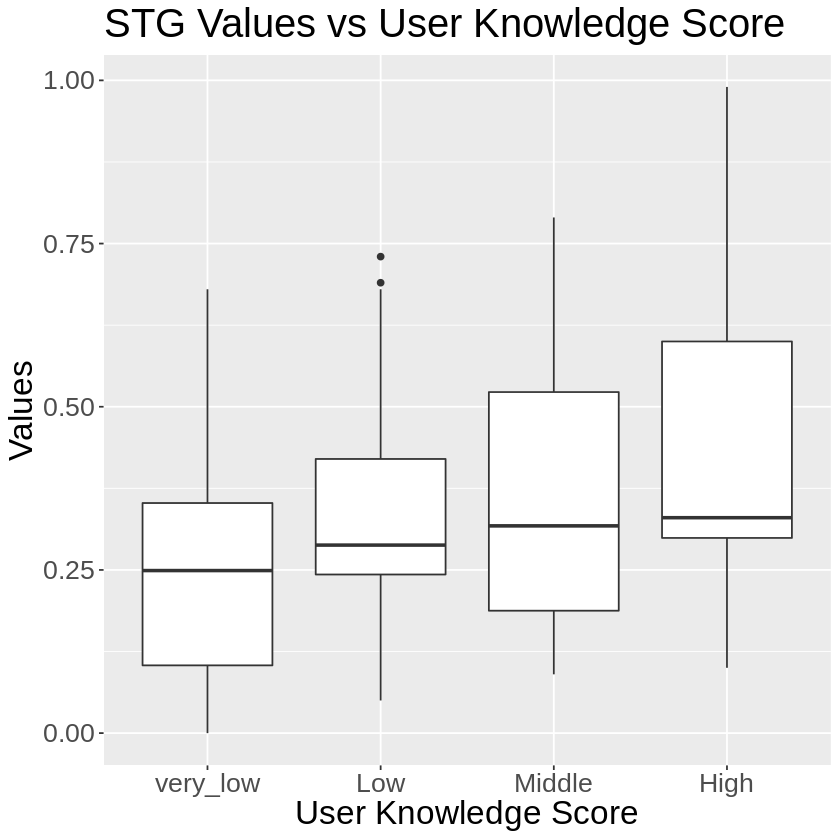

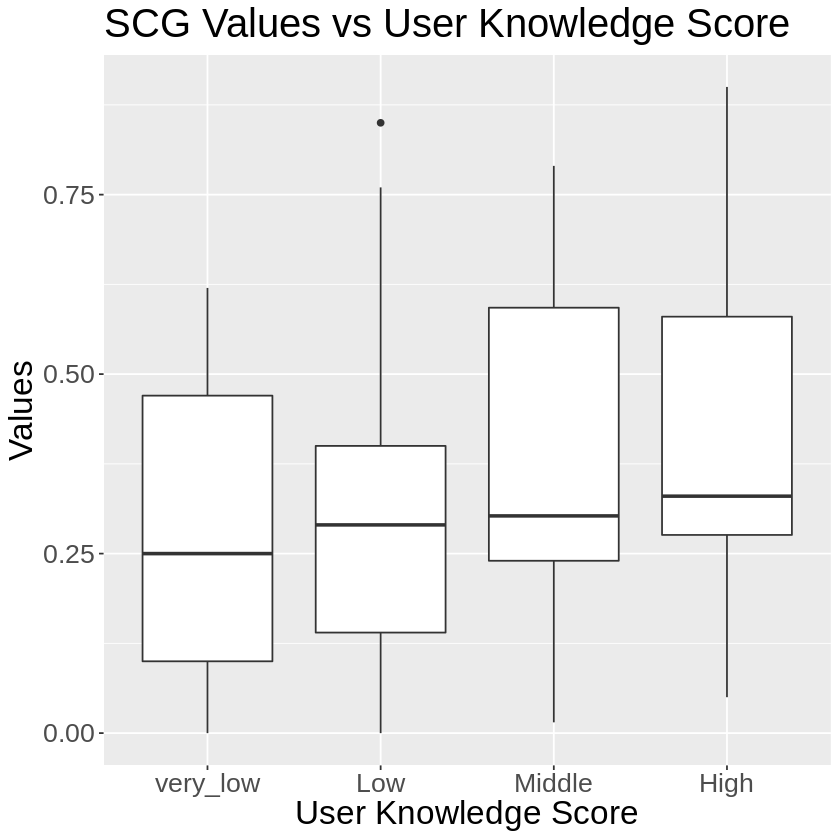

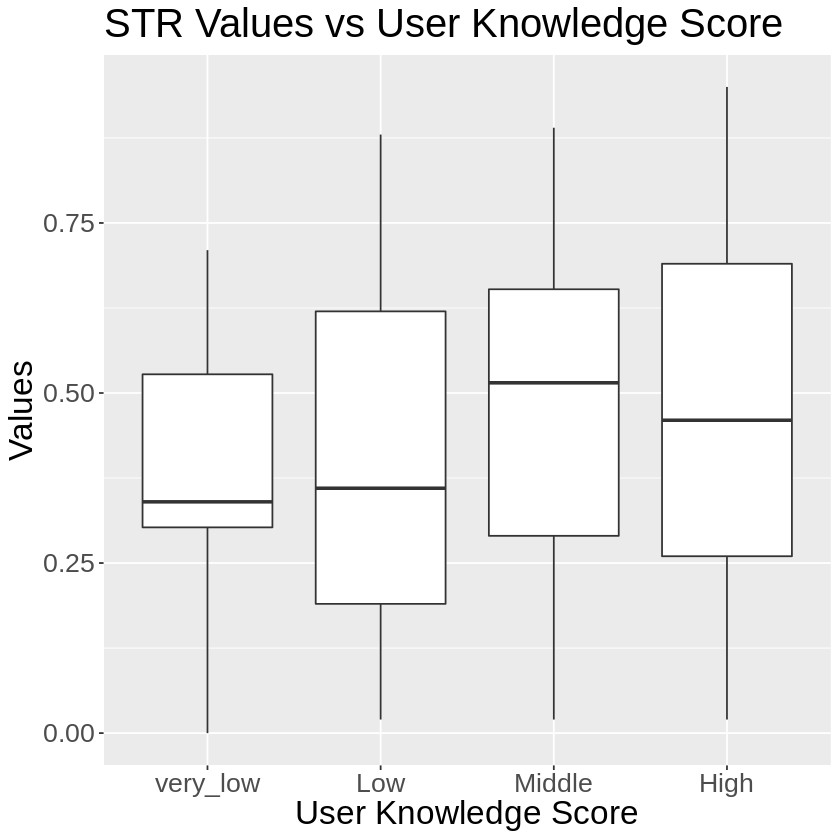

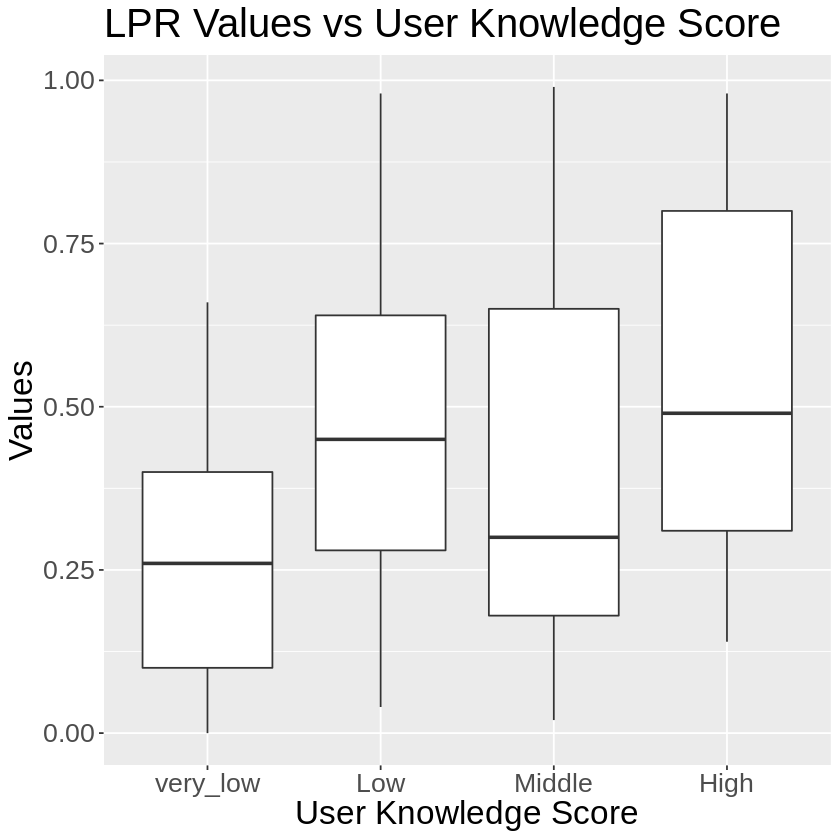

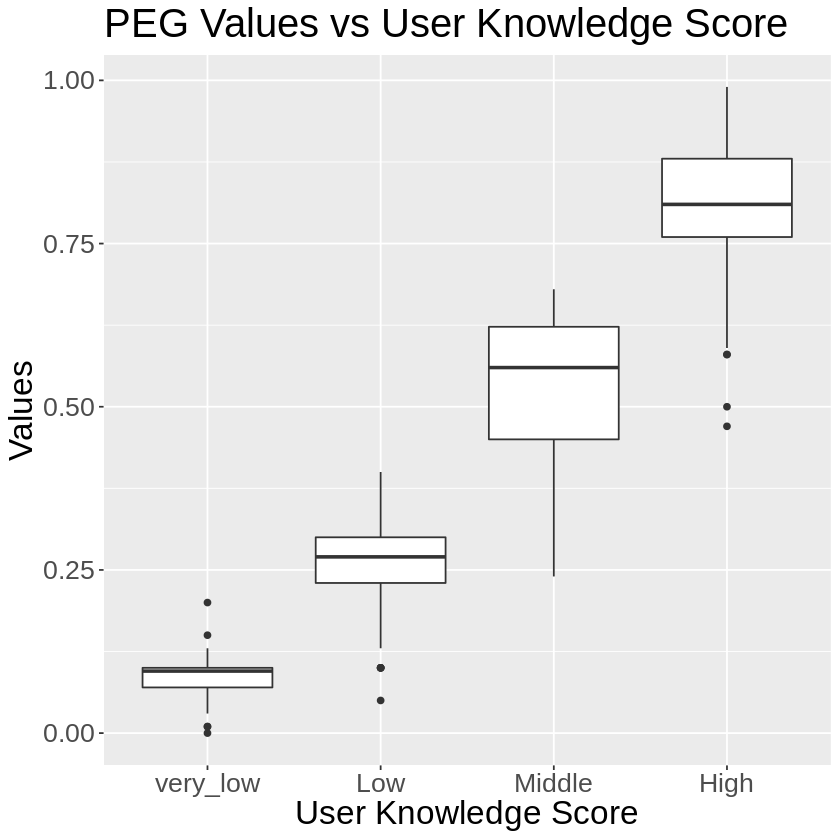

In [7]:
user_knowledge_data_STG <- knowledge_data_training %>%
select(STG, UNS)
user_knowledge_data_STG

user_knowledge_data_SCG <- knowledge_data_training %>%
select(SCG, UNS)
user_knowledge_data_SCG

user_knowledge_data_STR <- knowledge_data_training %>%
select(STR, UNS)
user_knowledge_data_STR

user_knowledge_data_LPR <- knowledge_data_training %>%
select(LPR, UNS)
user_knowledge_data_LPR

user_knowledge_data_PEG <- knowledge_data_training %>%
select(PEG, UNS)
user_knowledge_data_PEG

user_knowledge_data_STG$UNS <- factor(user_knowledge_data_STG$UNS, levels = c("very_low", "Low", "Middle", "High"))
STG_box_plot <- ggplot(user_knowledge_data_STG, aes(x = UNS, y = STG)) + 
                          geom_boxplot() +
                          labs(x = "User Knowledge Score", y = "Values", title= "STG Values vs User Knowledge Score") + 
                          theme(text = element_text(size = 20))
STG_box_plot

user_knowledge_data_SCG$UNS <- factor(user_knowledge_data_SCG$UNS, levels = c("very_low", "Low", "Middle", "High"))
SCG_box_plot <- ggplot(user_knowledge_data_SCG, aes(x = UNS, y = SCG)) + 
                          geom_boxplot() +
                          labs(x = "User Knowledge Score", y = "Values", title= "SCG Values vs User Knowledge Score") + 
                          theme(text = element_text(size = 20))
SCG_box_plot

user_knowledge_data_STR$UNS <- factor(user_knowledge_data_STR$UNS, levels = c("very_low", "Low", "Middle", "High"))
STR_box_plot <- ggplot(user_knowledge_data_STR, aes(x = UNS, y = STR)) + 
                          geom_boxplot() +
                          labs(x = "User Knowledge Score", y = "Values", title= "STR Values vs User Knowledge Score") + 
                          theme(text = element_text(size = 20))
STR_box_plot

user_knowledge_data_LPR$UNS <- factor(user_knowledge_data_LPR$UNS, levels = c("very_low", "Low", "Middle", "High"))
LPR_box_plot <- ggplot(user_knowledge_data_LPR, aes(x = UNS, y = LPR)) + 
                          geom_boxplot() +
                          labs(x = "User Knowledge Score", y = "Values", title= "LPR Values vs User Knowledge Score") + 
                          theme(text = element_text(size = 20))
LPR_box_plot

user_knowledge_data_PEG$UNS <- factor(user_knowledge_data_PEG$UNS, levels = c("very_low", "Low", "Middle", "High"))
PEG_box_plot <- ggplot(user_knowledge_data_PEG, aes(x = UNS, y = PEG)) + 
                          geom_boxplot() +
                          labs(x = "User Knowledge Score", y = "Values", title= "PEG Values vs User Knowledge Score") + 
                          theme(text = element_text(size = 20))
PEG_box_plot

    






Methods: 

<li> Explain how you will conduct either your data analysis and which variables/columns you will use </li>
2 grouped bar plots will be created, user_knowledge_g1_plot for STG, SCG, STR and user_knowledge_g2_plot for LPR and PEG graphs. This is because the two groups use a different scale between them, with the sum of the column values on the y-axis and the 4 groups of knowledge levels of users (UNS) on the x-axis. Each colored bar corresponds with the sum of a category's value for the given knowledge level. The bar heights of the attributes within the high and middle knowledge level categories will be compared to visually evaluate and select for 1 attribute from each group (1 from STG, SCG, and STR, and 1 from LPR and PEG) that appears most closely linked to the two chosen knowledge levels, in the form of having the highest column heights in those two categories. 
<br><br>


<li> Describe at least one way that you will visualize the results </li>
A scatter plot to compare these two identified attributes will be made and the correlation strength and direction will be visually evaluated. 




<br><br>
Expected Outcomes and Significance:

<li> What we Expect to Find </li>
We expect to find two attributes that are the closest linked to a middle or high knowledge level and the correlation between the two implicated attributes. <br>

<li> Impact of our Findings </li>
The findings could be used to devise learning strategies and frameworks, within the field of electrical DC machines, that would prioritize the selected attributes to maximize user knowledge levels in a given period of time with greater efficiency. 
<br>

<li> Future Questions </li>
- Is the result consistent over similar domains of knowledge and technical fields? <br>
- What factors make the attribute closest linked to user knowledge level as such? <br>
- What attributes are the least linked and why? <br>
- What are the patterns in how different combinations of attributes affect knowledge level? <br>




<br><br>References: 

H. T. Kahraman, Sagiroglu, S., Colak, I., Developing intuitive knowledge classifier and modeling of users' domain dependent data in web, Knowledge Based Systems, vol. 37, pp. 283-295, 2013.

Zeina Bitar, Abbas Sandouk, Samih Al Jabi,
Testing the Performances of DC Series Motor Used in Electric Car,
Energy Procedia,
Volume 74,
2015,
Pages 148-159,
ISSN 1876-6102,
https://doi.org/10.1016/j.egypro.2015.07.536.
(https://www.sciencedirect.com/science/article/pii/S1876610215013041)



Group 002-08: Christopher Davis, Eashan Halbe, Moira Renata, Riley Lowe